In [172]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [239]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [11]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [ ]:
#Lematizacion 
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
vect_lemas = CountVectorizer(stop_words='english', analyzer=split_into_lemmas)

X_dtm = vect_lemas.fit_transform(dataTraining['plot'])
X_dtm.shape

In [ ]:
# Definición de variables predictoras (X)
vect = CountVectorizer(stop_words='english')
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

In [ ]:
#Bigramas 
# Definición de variables predictoras (X)
vect = CountVectorizer(stop_words='english', ngram_range=(1, 3))
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

In [17]:
# Idf 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) ##Pruebas 2
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2)) # puse bigramas
X_dtm_1 = vect.fit_transform(dataTraining['plot'])

X_dtm = tfidf_transformer.fit_transform(X_dtm_1)
X_dtm.shape 


(7895, 450140)

In [ ]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [ ]:
%%time
# Definición y entrenamiento
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=30, random_state=42))
clf.fit(X_train, y_train_genres)

In [ ]:
# Predicción del modelo de clasificación
y_pred_genres = clf.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

# Sin lemas 0.7963860628253788
# COn lemas 0.7983106666028829
# COn bigramas 0.7737576554408515
# Con IDF 0.807300692490283

In [ ]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
# Definición y entrenamiento
#lr = OneVsRestClassifier(LogisticRegression(random_state=123, solver='lbfgs', max_iter=3000, C=0.01, n_jobs=-1))
# lr = OneVsRestClassifier(LogisticRegression(random_state=123, solver='newton-cg', max_iter=500, C=0.1, n_jobs=-1, penalty='l2')) --- el mejor score 
lr = OneVsRestClassifier(LogisticRegression(random_state=123, solver='saga', max_iter=500, C=1, n_jobs=-1)) 
lr.fit(X_train, y_train_genres)

In [ ]:
# Predicción del modelo de clasificación
y_pred_genres = lr.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

# Sin lematizacion 0.8591001418951785
# Con lematizacion 0.8361467846711504
# Sin lematizar con bigramas 0.8598116682546477
# sin Lematizar con trigramas 0.8590851191421395
# Con iDF 0.8710286526905197 - sag 0.8710200204640789 - newton-cg 0.8710310801528628
# COn IDF sag 500 = 0.8721597443007804
# COn IDF saga 500 C 1 = 0.8763304693871596
# Con IDB y Bigramas saga = 0.8777956356836194
# Ultimo 0.8777956356836194

In [ ]:
%%time

# Definición y entrenamiento
lr2 = OneVsRestClassifier(LogisticRegression(random_state=123, n_jobs=-1))
lr2.fit(X_train, y_train_genres)

# Predicción del modelo de clasificación
y_pred_genres = lr2.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt = OneVsRestClassifier(DecisionTreeClassifier(random_state=123))
dt.fit(X_train, y_train_genres)
y_pred = dt.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred, average='macro')

In [ ]:
%%time
from sklearn.svm import SVC

svm = OneVsRestClassifier(SVC(random_state=123))
svm.fit(X_train, y_train_genres)
y_pred = svm.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred, average='macro')

In [ ]:
%%time
from xgboost import XGBClassifier

xgb = OneVsRestClassifier(XGBClassifier(random_state=123))
xgb.fit(X_train, y_train_genres)
y_pred = xgb.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred, average='macro')

In [ ]:
%%time
from sklearn.ensemble import AdaBoostClassifier

adaboost = OneVsRestClassifier(AdaBoostClassifier(random_state=123))
adaboost.fit(X_train, y_train_genres)
y_pred = adaboost.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred, average='macro')

In [ ]:
# transformación variables predictoras X del conjunto de test
X_test_dtm_1 = vect.transform(dataTesting['plot'])
X_test_dtm = tfidf_transformer.transform(X_test_dtm_1)

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = lr.predict_proba(X_test_dtm)

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_LR_TIDF_3.csv', index_label='ID')
res.head()

Ejemplo interesante sobre algo similar..

https://github.com/tomkeith/Multi-label-classification-with-NLP


Ejemplo de análisis 

https://www.kaggle.com/code/saisandeepjallepalli/imdb-5000-eda-and-data-visualization

In [25]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Conv1D
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

# Suponiendo que tienes dos listas: 'plots' (las descripciones de las películas)
# y 'genres' (las listas de géneros correspondientes)


In [18]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

In [19]:
# Procesamiento del texto
maxlen = 100  # longitud de las secuencias
max_words = 10000  # número máximo de palabras a considerar

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dataTraining['plot'])
sequences = tokenizer.texts_to_sequences(dataTraining['plot'])

word_index = tokenizer.word_index
print(f'{len(word_index)} unique tokens found.')

data = pad_sequences(sequences, maxlen=maxlen)

multilabel_binarizer = MultiLabelBinarizer()
labels = multilabel_binarizer.fit_transform(dataTraining['genres'])

38706 unique tokens found.


In [20]:
data

array([[ 272,   60, 2974, ...,   44, 8503,  148],
       [   0,    0,    0, ..., 1145,  550, 1890],
       [   6, 2813,    3, ...,  114,   70, 1978],
       ...,
       [   0,    0,    0, ...,  138,    4,  487],
       [  17,    1,  653, ...,  157,    1,  341],
       [   0,    0,    0, ...,    4, 4194, 2231]])

In [21]:

# Dividir los datos en un conjunto de entrenamiento y un conjunto de validación
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2)

# Construcción del modelo
model = Sequential()
model.add(Embedding(max_words, 50, input_length=maxlen))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(multilabel_binarizer.classes_), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Entrenamiento del modelo
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))


Epoch 1/10
198/198 [==============================] - 7s 29ms/step - loss: 0.3199 - acc: 0.2137 - val_loss: 0.2860 - val_acc: 0.1906
Epoch 2/10
198/198 [==============================] - 6s 31ms/step - loss: 0.2553 - acc: 0.2867 - val_loss: 0.2645 - val_acc: 0.2717
Epoch 3/10
198/198 [==============================] - 6s 30ms/step - loss: 0.1734 - acc: 0.4580 - val_loss: 0.2598 - val_acc: 0.3008
Epoch 4/10
198/198 [==============================] - 5s 27ms/step - loss: 0.0877 - acc: 0.5380 - val_loss: 0.2945 - val_acc: 0.2932
Epoch 5/10
198/198 [==============================] - 6s 29ms/step - loss: 0.0385 - acc: 0.5434 - val_loss: 0.3502 - val_acc: 0.2989
Epoch 6/10
198/198 [==============================] - 6s 29ms/step - loss: 0.0170 - acc: 0.5500 - val_loss: 0.4023 - val_acc: 0.2894
Epoch 7/10
198/198 [==============================] - 6s 29ms/step - loss: 0.0085 - acc: 0.5416 - val_loss: 0.4514 - val_acc: 0.3015
Epoch 8/10
198/198 [==============================] - 5s 27ms/step - 

In [ ]:
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import nltk

In [37]:
# Tokenizar el texto
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(dataTraining['plot'])
sequences = tokenizer.texts_to_sequences(dataTraining['plot'])
x = pad_sequences(sequences, maxlen=200)

# Transformar las etiquetas en un formato que se pueda alimentar en la red
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(dataTraining['genres'])
y = multilabel_binarizer.transform(dataTraining['genres'])

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Definir la red
model = Sequential()
model.add(Embedding(5000, 50, input_length=200))
model.add(Conv1D(100, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(y.shape[1], activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy',  metrics=['acc'])

# Entrenar el modelo
model.fit(x_train, y_train, validation_split=0.1, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# Evaluar el modelo
#y_pred = model.predict(x_test)
#auc = roc_auc_score(y_test, y_pred, average='macro')


Epoch 1/10
87/87 [==============================] - 4s 37ms/step - loss: 0.3080 - acc: 0.2164 - val_loss: 0.2704 - val_acc: 0.2393
Epoch 2/10
87/87 [==============================] - 3s 36ms/step - loss: 0.2457 - acc: 0.2995 - val_loss: 0.2591 - val_acc: 0.2604
Epoch 3/10
87/87 [==============================] - 3s 38ms/step - loss: 0.2095 - acc: 0.3599 - val_loss: 0.2527 - val_acc: 0.2773
Epoch 4/10
87/87 [==============================] - 3s 37ms/step - loss: 0.1725 - acc: 0.4086 - val_loss: 0.2606 - val_acc: 0.2778
Epoch 5/10
87/87 [==============================] - 3s 34ms/step - loss: 0.1407 - acc: 0.4385 - val_loss: 0.2980 - val_acc: 0.2436
Epoch 6/10
87/87 [==============================] - 3s 33ms/step - loss: 0.1112 - acc: 0.4656 - val_loss: 0.3226 - val_acc: 0.2727
Epoch 7/10
87/87 [==============================] - 3s 36ms/step - loss: 0.0853 - acc: 0.4785 - val_loss: 0.3831 - val_acc: 0.2457
Epoch 8/10
87/87 [==============================] - 3s 35ms/step - loss: 0.0665 - a

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

# Cargamos los datos
#df = pd.read_csv('movies.csv') # Reemplazar con tu archivo

# Convertir las cadenas de lista en listas
dataTraining['genres'] = dataTraining['genres'].apply(eval)

# Inicializar MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Ajustar y transformar los géneros a representación binaria
labels = mlb.fit_transform(dataTraining['genres'])

# Preprocesamiento del texto
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(dataTraining['plot'])
sequences = tokenizer.texts_to_sequences(dataTraining['plot'])
word_index = tokenizer.word_index

# Asegurar que todas las secuencias tengan la misma longitud
data = pad_sequences(sequences, maxlen=500)

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

# Construir el modelo
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128, input_length=500))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(labels[0]), activation='sigmoid')) # Cambiar 'softmax' por 'sigmoid'

# Compilar el modelo
model.compile(loss='binary_crossentropy',  # Cambiar 'categorical_crossentropy' por 'binary_crossentropy'
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, y_test))


Epoch 1/10
44/44 [==============================] - 709s 16s/step - loss: 0.3927 - accuracy: 0.1806 - val_loss: 0.2922 - val_accuracy: 0.1908
Epoch 2/10
44/44 [==============================] - 934s 21s/step - loss: 0.2946 - accuracy: 0.2007 - val_loss: 0.2914 - val_accuracy: 0.1908
Epoch 3/10
44/44 [==============================] - 1094s 25s/step - loss: 0.2941 - accuracy: 0.2007 - val_loss: 0.2913 - val_accuracy: 0.1908
Epoch 4/10
44/44 [==============================] - 1225s 28s/step - loss: 0.2928 - accuracy: 0.2007 - val_loss: 0.2906 - val_accuracy: 0.1908
Epoch 5/10
44/44 [==============================] - 1307s 30s/step - loss: 0.2902 - accuracy: 0.2032 - val_loss: 0.2912 - val_accuracy: 0.1908
Epoch 6/10
44/44 [==============================] - 1352s 31s/step - loss: 0.2847 - accuracy: 0.2448 - val_loss: 0.2898 - val_accuracy: 0.1971
Epoch 7/10
44/44 [==============================] - 1395s 32s/step - loss: 0.2764 - accuracy: 0.2682 - val_loss: 0.2913 - val_accuracy: 0.2127
E

In [68]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [58]:
### Procesamiento y split de Datos 1

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tus datos, donde movie_plots es una lista de descripciones de películas
movie_plots = dataTraining['plot']

# Preprocesamiento del texto para eliminar las palabras de parada
movie_plots = [' '.join([word for word in plot.lower().split() if word not in stop_words])
               for plot in movie_plots]

# Ajuste del tokenizador
tokenizer = Tokenizer(num_words=4000)  # puedes ajustar num_words según tus datos
tokenizer.fit_on_texts(movie_plots)

# Transforma el texto en secuencias de enteros
sequences = tokenizer.texts_to_sequences(movie_plots)
word_index = tokenizer.word_index

# Ajustar la longitud de las secuencias con pad_sequences
X = pad_sequences(sequences, maxlen=4000)  # puedes ajustar maxlen según tus datos

# Convertir las cadenas de lista en listas
dataTraining['genres'] = dataTraining['genres'].apply(eval)

# Inicializar MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Ajustar y transformar los géneros a representación binaria
labels = mlb.fit_transform(dataTraining['genres'])


# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wmorales\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
### Procesamiento y split de Datos 2

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Función para convertir la etiqueta POS de nltk en una etiqueta POS que lemmatize() puede usar
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Aplicar lemmatization en lugar de simplemente dividir en palabras
movie_plots = [' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) 
                         for word in plot.lower().split() if word not in stop_words])
               for plot in movie_plots]

# Ajuste del tokenizador
tokenizer = Tokenizer(num_words=4000)  # puedes ajustar num_words según tus datos
tokenizer.fit_on_texts(movie_plots)

# Transforma el texto en secuencias de enteros
sequences = tokenizer.texts_to_sequences(movie_plots)
word_index = tokenizer.word_index

# Ajustar la longitud de las secuencias con pad_sequences
X = pad_sequences(sequences, maxlen=4000)  # puedes ajustar maxlen según tus datos

# Convertir las cadenas de lista en listas
dataTraining['genres'] = dataTraining['genres'].apply(eval)

# Inicializar MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Ajustar y transformar los géneros a representación binaria
labels = mlb.fit_transform(dataTraining['genres'])


# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wmorales\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wmorales\AppData\Roaming\nltk_data...


LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\wmorales/nltk_data'
    - 'C:\\Users\\wmorales\\anaconda3\\nltk_data'
    - 'C:\\Users\\wmorales\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\wmorales\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\wmorales\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [75]:
#Procesamiento de datos 3

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Preprocesamiento de texto y transformación con TF-IDF
tfidf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False)
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2),max_features=200)
X_dtm_1 = vect.fit_transform(dataTraining['plot'])
X_dtm = tfidf_transformer.fit_transform(X_dtm_1)

X = X_dtm.toarray()


x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=4)

In [76]:
x_train.shape

(5526, 200)

In [269]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Conv1D, LSTM
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from nltk.corpus import stopwords
from livelossplot import PlotLossesKeras
import nltk



# Construir el modelo
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128, input_length=500))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(labels[0]), activation='sigmoid')) # Cambiar 'softmax' por 'sigmoid'

# Compilar el modelo
model.compile(loss='binary_crossentropy',  # Cambiar 'categorical_crossentropy' por 'binary_crossentropy'
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
#model.fit(padded_docs_train, y_train,
          #batch_size=128,
          #epochs=5,
          #validation_data=(x_test, y_test))#


### #Compilacion del modelo 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Early stopping para detener el entrenamiento cuando el modelo deje de mejorar
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

model.fit(padded_docs_train, y_train, validation_data=(padded_docs_test, y_test), epochs=50, callbacks=[early_stop,PlotLossesKeras()])




TypeError: object of type 'numpy.int32' has no len()

In [27]:
# transformación variables predictoras X del conjunto de test

movie_plots_test = dataTesting['plot']
movie_plots_test = [' '.join([word for word in plot.lower().split() if word not in stop_words])
               for plot in movie_plots_test]
tokenizer.fit_on_texts(movie_plots_test)
sequences_2 = tokenizer.texts_to_sequences(movie_plots_test)
X_test = pad_sequences(sequences_2, maxlen=500)


cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = model.predict(X_test)

106/106 [==============================] - 7s 69ms/step


In [28]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RN_3.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.266457,0.082089,0.018396,0.044112,0.265961,0.284068,0.112413,0.472100,0.060196,0.044251,...,0.021417,0.140248,0.000976,0.084556,0.025974,0.016949,0.037573,0.445536,0.065915,0.044133
4,0.091251,0.020430,0.004616,0.090702,0.376203,0.244862,0.053615,0.653751,0.023926,0.019496,...,0.028271,0.065270,0.000979,0.170264,0.005488,0.012160,0.056804,0.214850,0.052608,0.015152
5,0.022685,0.013433,0.002781,0.032276,0.490477,0.126610,0.006812,0.743174,0.018175,0.027152,...,0.046061,0.076860,0.001194,0.703572,0.005802,0.006173,0.046793,0.128982,0.017650,0.007208
6,0.281281,0.064066,0.009842,0.030833,0.249470,0.462358,0.044725,0.645365,0.053575,0.033372,...,0.023959,0.210948,0.000844,0.110607,0.017298,0.010568,0.035704,0.617225,0.065444,0.030987
7,0.307329,0.198212,0.036357,0.026273,0.220719,0.179258,0.051225,0.377106,0.118287,0.125298,...,0.027586,0.209045,0.001047,0.088837,0.081543,0.012477,0.023003,0.514213,0.043920,0.050293


In [78]:
# Otra Red 

from keras.models import Sequential
from keras.layers import Flatten, Dense, Softmax, Dropout

model = Sequential()
model.add(Dense(256, input_shape = x_train[0].shape, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(24, activation='sigmoid'))

model.compile(optimizer = 'adam',
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [40]:
X[0].shape

(500,)

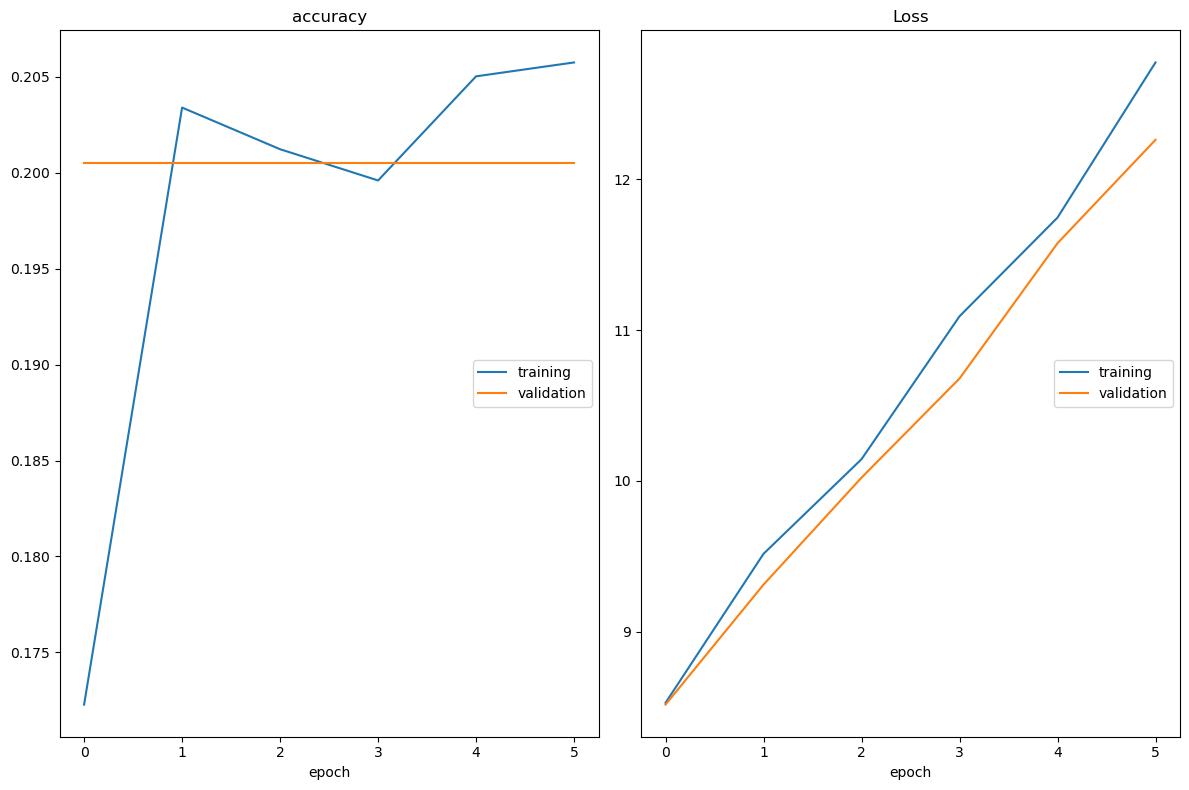

accuracy
	training         	 (min:    0.172, max:    0.206, cur:    0.206)
	validation       	 (min:    0.201, max:    0.201, cur:    0.201)
Loss
	training         	 (min:    8.529, max:   12.774, cur:   12.774)
	validation       	 (min:    8.517, max:   12.261, cur:   12.261)
173/173 [==============================] - 4s 22ms/step - loss: 12.7740 - accuracy: 0.2058 - val_loss: 12.2610 - val_accuracy: 0.2005
Epoch 6: early stopping


In [79]:
#history = model.fit(features, y_train, validation_data = (features_test, y_test), epochs = 50)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50,callbacks=[early_stop, PlotLossesKeras()])

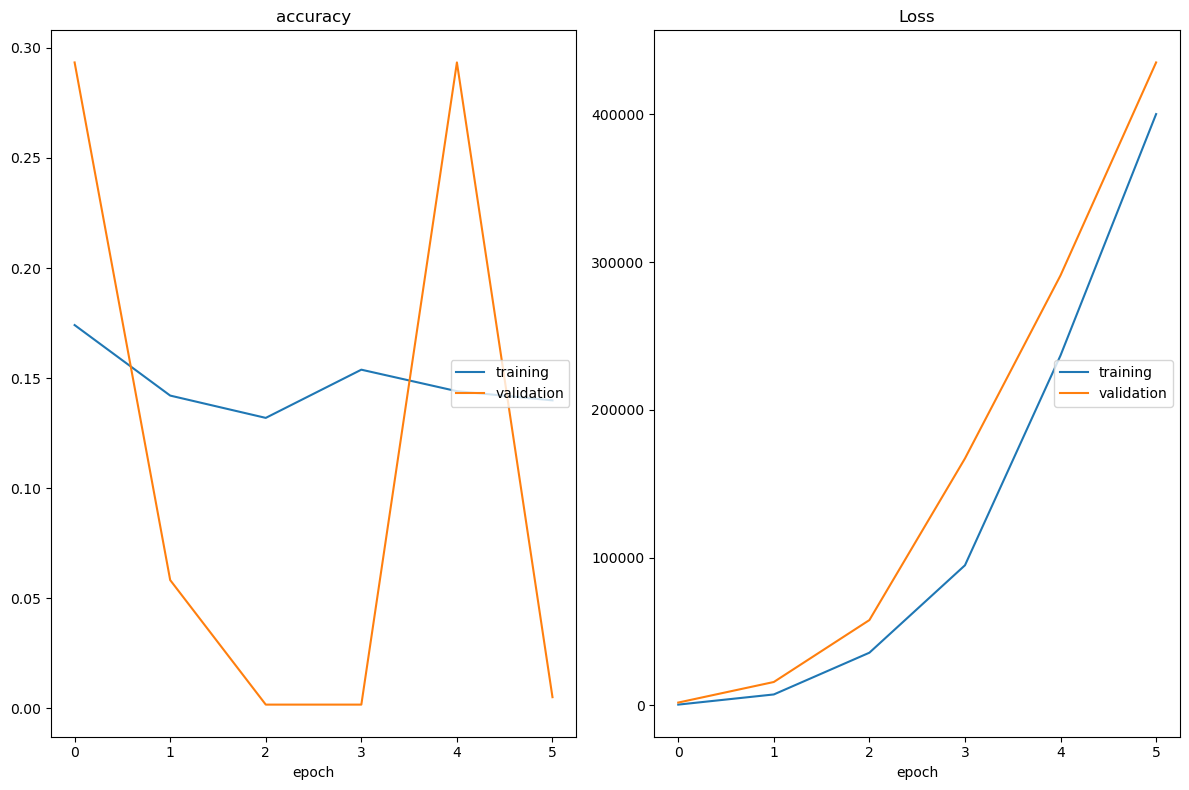

accuracy
	training         	 (min:    0.132, max:    0.174, cur:    0.140)
	validation       	 (min:    0.002, max:    0.293, cur:    0.005)
Loss
	training         	 (min:  467.769, max: 400154.625, cur: 400154.625)
	validation       	 (min: 1852.986, max: 435110.812, cur: 435110.812)
173/173 [==============================] - 3s 18ms/step - loss: 400154.6250 - accuracy: 0.1399 - val_loss: 435110.8125 - val_accuracy: 0.0051
Epoch 6: early stopping


In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import CategoricalCrossentropy

# Definición del modelo
model = Sequential()
model.add(Dense(256, input_shape = x_train[0].shape, activation = 'relu'))
model.add(Dropout(0.2)) # Añade Dropout para prevenir el overfitting
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2)) # Añade Dropout
model.add(Dense(64, activation = 'relu')) # Añade otra capa Dense
model.add(Dense(24, activation='softmax')) # Usa 'softmax' en la última capa para clasificación multiclase

# Optimizador Adam con tasa de aprendizaje personalizada
optimizer = Adam(learning_rate=0.001)

# Compilación del modelo
model.compile(optimizer = optimizer,
              loss=CategoricalCrossentropy(), # Usa CategoricalCrossentropy para la clasificación multiclase
              metrics=['accuracy'])

# Early stopping para detener el entrenamiento cuando el modelo deje de mejorar
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[early_stop,PlotLossesKeras()])


In [270]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [147]:
# Idf 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# tfidf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) ##Pruebas 2
vect = CountVectorizer(stop_words='english') # puse bigramas
X_dtm_1 = vect.fit_transform(dataTraining['plot'])

X_dtm = tfidf_transformer.fit_transform(X_dtm_1)
X = X_dtm.toarray()

In [137]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataTraining['plot']).toarray()

In [119]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
Y= np.array(y_genres)


In [148]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [143]:
y_train.shape

(5526, 24)

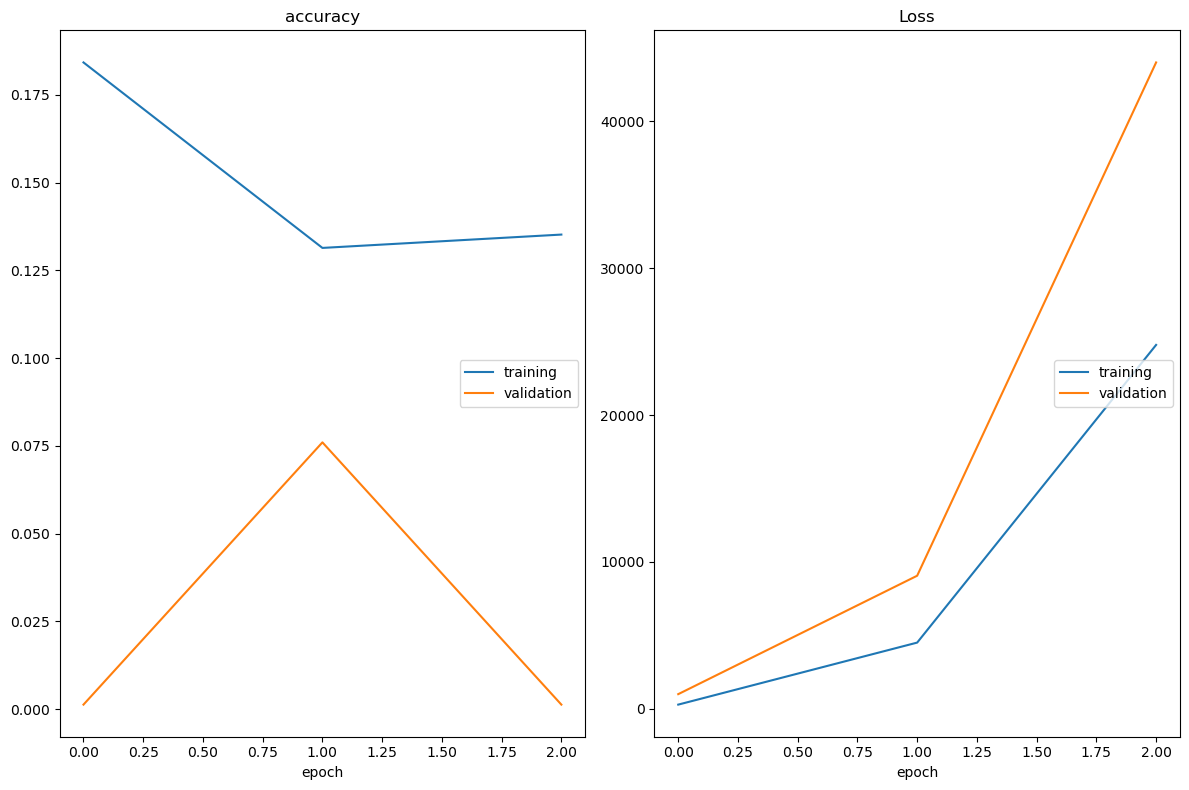

accuracy
	training         	 (min:    0.131, max:    0.184, cur:    0.135)
	validation       	 (min:    0.001, max:    0.076, cur:    0.001)
Loss
	training         	 (min:  294.053, max: 24770.713, cur: 24770.713)
	validation       	 (min: 1005.928, max: 43992.180, cur: 43992.180)
173/173 [==============================] - 61s 353ms/step - loss: 24770.7129 - accuracy: 0.1352 - val_loss: 43992.1797 - val_accuracy: 0.0013
Epoch 3: early stopping


In [154]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import CategoricalCrossentropy

# Construcción del modelo de red neuronal
model = Sequential()
model.add(Dense(256, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(24, activation='softmax'))


#Compilacion del modelo 
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])


# Early stopping para detener el entrenamiento cuando el modelo deje de mejorar
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, callbacks=[early_stop,PlotLossesKeras()])


In [161]:
from sklearn.metrics import roc_auc_score

# Obtén las predicciones de tu modelo como probabilidades
y_pred_proba = model.predict(x_test)

# Calcula el AUC-ROC para cada etiqueta y luego toma el promedio
auc = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')

print('AUC:', auc)


50/50 [==============================] - 2s 33ms/step
AUC: 0.5067284568795953


In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', lowercase = True)
X = vectorizer.fit_transform(dataTraining['plot']).toarray()


# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
Y= np.array(y_genres)



# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




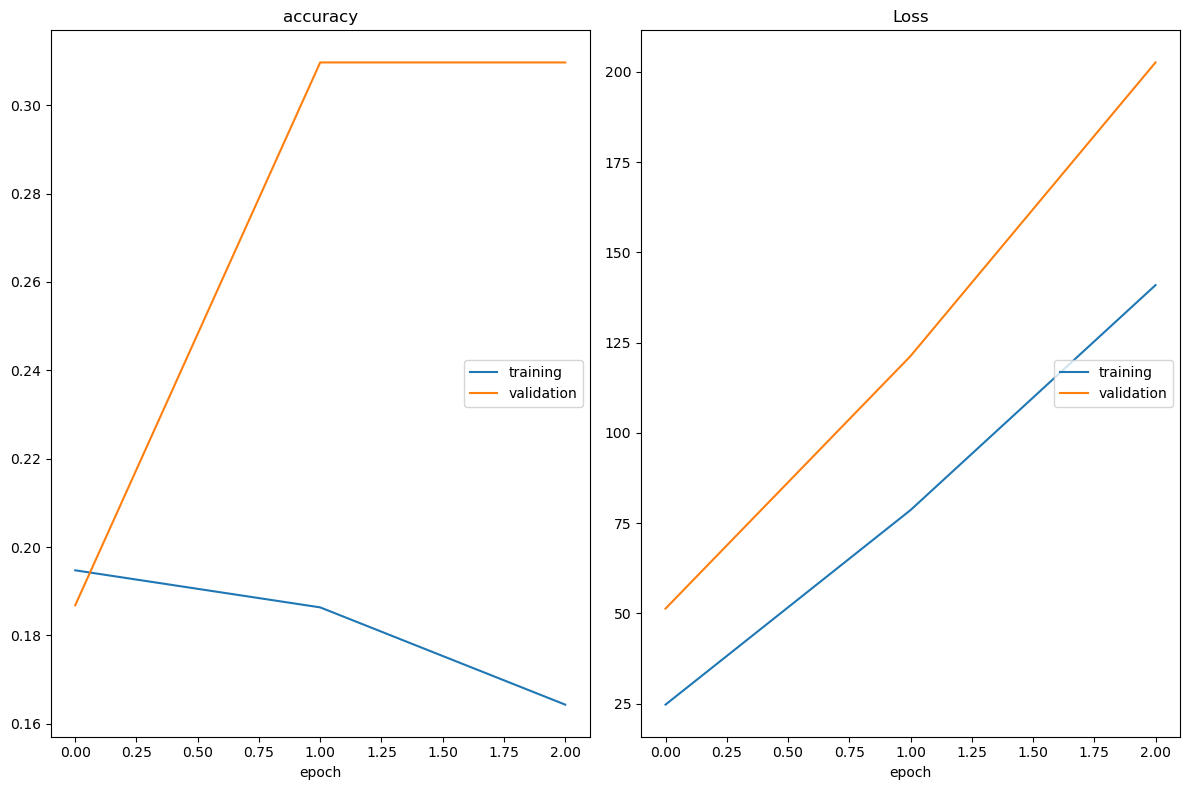

accuracy
	training         	 (min:    0.164, max:    0.195, cur:    0.164)
	validation       	 (min:    0.187, max:    0.310, cur:    0.310)
Loss
	training         	 (min:   24.725, max:  140.941, cur:  140.941)
	validation       	 (min:   51.329, max:  202.644, cur:  202.644)
198/198 [==============================] - 59s 298ms/step - loss: 140.9410 - accuracy: 0.1643 - val_loss: 202.6445 - val_accuracy: 0.3097
Epoch 3: early stopping


In [160]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Softmax, Dropout

model = Sequential()
model.add(Dense(256, input_shape = (x_train.shape[1],), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(24, activation='softmax'))



#Compilacion del modelo 
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])


# Early stopping para detener el entrenamiento cuando el modelo deje de mejorar
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=[early_stop,PlotLossesKeras()])


In [174]:
df = dataTraining 
df_test = dataTesting

In [175]:
def gdd(x):
    a=x.split()
    return len(a)

In [176]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [179]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [181]:
from tqdm import tqdm
preprocessed_plot = []
# tqdm is for printing the status bar
for sentance in df['plot'].values:
    sentance = decontracted(sentance)
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_plot.append(sentance.strip())

In [230]:
from tqdm import tqdm
preprocessed_plot_test = []
# tqdm is for printing the status bar
for sentance in df_test['plot'].values:
    sentance = decontracted(sentance)
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_plot_test.append(sentance.strip())

In [231]:
df_test['preprocessed_plot_test']=preprocessed_plot_test

In [183]:
df['preprocessed_plot']=preprocessed_plot

In [185]:
df.columns

Index(['year', 'title', 'plot', 'genres', 'rating', 'preprocessed_plot'], dtype='object')

In [186]:
df['genres'] = df['genres'].map(lambda x: eval(x))

In [201]:
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
Y= np.array(y_genres)

X = df['preprocessed_plot'].values

In [204]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [206]:
max(df['plot'].apply(gdd))

1863

In [207]:
vect=Tokenizer()
vect.fit_on_texts(df['plot'])
vocab_size = len(vect.word_index) + 1

In [208]:
vocab_size

38707

In [209]:
encoded_docs_train = vect.texts_to_sequences(x_train)
max_length = vocab_size
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=1200, padding='post')
print(padded_docs_train)

[[20809   597    70 ...     0     0     0]
 [  895 22492  2580 ...     0     0     0]
 [ 1531  2766  2432 ...     0     0     0]
 ...
 [ 8894  3515 25493 ...     0     0     0]
 [ 2766  7610  4056 ...     0     0     0]
 [  108    49  2678 ...     0     0     0]]


In [210]:
encoded_docs_test = vect.texts_to_sequences(x_test)
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=1200, padding='post')

In [234]:
encoded_docs_test_k = vect.texts_to_sequences(df_test['preprocessed_plot_test'].values)
padded_docs_test_k = pad_sequences(encoded_docs_test_k, maxlen=1200, padding='post')

In [211]:
def f1micro(y_true, y_pred):
    return tf.py_func(f1_score(y_true, y_pred,average='mirco'),tf.double)

In [215]:
from keras.layers import Dense, Flatten, LSTM, Conv1D, Conv2D, MaxPooling1D, Dropout, Activation,GlobalMaxPool1D
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam
from time import time
from keras.callbacks import TensorBoard
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

from keras.layers import Embedding
from keras.callbacks import ReduceLROnPlateau

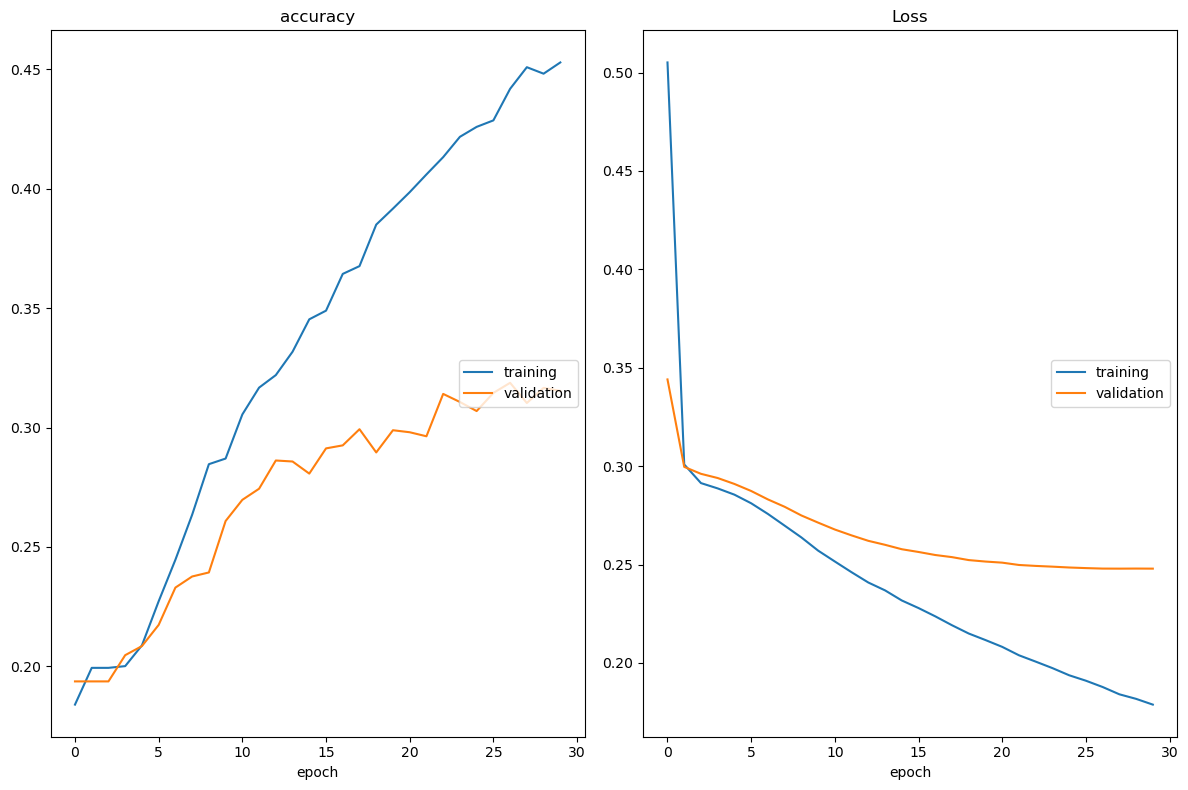

accuracy
	training         	 (min:    0.184, max:    0.453, cur:    0.453)
	validation       	 (min:    0.194, max:    0.319, cur:    0.315)
Loss
	training         	 (min:    0.179, max:    0.505, cur:    0.179)
	validation       	 (min:    0.248, max:    0.344, cur:    0.248)
173/173 [==============================] - 35s 200ms/step - loss: 0.1788 - accuracy: 0.4528 - val_loss: 0.2479 - val_accuracy: 0.3153
Epoch 30: early stopping


In [224]:
#Compilacion del modelo 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Early stopping para detener el entrenamiento cuando el modelo deje de mejorar
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

model.fit(padded_docs_train, y_train, validation_data=(padded_docs_test, y_test), epochs=50, callbacks=[early_stop,PlotLossesKeras()])



In [236]:
# Predicción del conjunto de test
y_pred_test_genres = model.predict(padded_docs_test_k)

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=df_test.index, columns=cols)
res.to_csv('pred_genres_text_RN_4.csv', index_label='ID')
res.head()

106/106 [==============================] - 2s 16ms/step


,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.064514,0.081663,0.022913,0.036711,0.489977,0.061992,0.008035,0.708454,0.070464,0.137846,...,0.069202,0.044703,0.001428,0.698182,0.052663,0.018618,0.034535,0.120069,0.049874,0.023160
4,0.013506,0.012920,0.003754,0.153818,0.118373,0.228652,0.098906,0.581966,0.011910,0.014250,...,0.018490,0.298038,0.002568,0.061447,0.047951,0.016996,0.065089,0.321212,0.013395,0.017000
5,0.112991,0.017614,0.000466,0.016681,0.169018,0.589157,0.000767,0.796836,0.003333,0.006964,...,0.004630,0.309189,0.000044,0.120612,0.014945,0.000178,0.012020,0.677413,0.006287,0.011033
6,0.092425,0.051942,0.007734,0.092577,0.270361,0.254030,0.027219,0.746760,0.020060,0.034255,...,0.022807,0.094124,0.000704,0.238457,0.028692,0.006613,0.037698,0.284169,0.039026,0.030111
7,0.155420,0.158726,0.014906,0.008415,0.073031,0.037341,0.011641,0.287012,0.030973,0.144057,...,0.019326,0.190081,0.000355,0.065975,0.441031,0.002404,0.006479,0.406378,0.016694,0.009036


In [275]:
# Idf 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) ##Pruebas 2
vect = CountVectorizer(ngram_range=(1, 3))##, ngram_range=(1, 2)) # puse bigramas
X_dtm_1 = vect.fit_transform(df['preprocessed_plot'])

X_dtm = tfidf_transformer.fit_transform(X_dtm_1)
X_dtm.shape 


(7895, 991642)

In [272]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [277]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.3, random_state=42)

In [279]:
%%time
from sklearn.linear_model import LogisticRegression
lr = OneVsRestClassifier(LogisticRegression(random_state=123, solver='saga', max_iter=500, C=1, n_jobs=-1, multi_class='ovr')) 
lr.fit(X_train, y_train_genres)


# Predicción del modelo de clasificación
y_pred_genres = lr.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

# BIgramas nueva limpieza 0.8787805268043926
# lr = OneVsRestClassifier(LogisticRegression(random_state=123, solver='saga', max_iter=200, C=1, n_jobs=-1, multi_class='multinomial'))  0.880323932358768

CPU times: total: 2.84 s
Wall time: 2min 48s


0.8787867280515181

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Definir el modelo base
base_lr = OneVsRestClassifier(LogisticRegression(random_state=123, solver='saga', max_iter=200, n_jobs=-1, multi_class='multinomial'))

# Definir los hiperparámetros que se quieren optimizar
param_grid = {
    'estimator__C': [0.1, 1, 10], # Puedes modificar esta lista según tus necesidades
    'estimator__max_iter': [100, 200, 300], # Puedes modificar esta lista según tus necesidades
    'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'estimator__multi_class': ['auto', 'ovr', 'multinomial']
}

# Definir el objeto GridSearch
grid_lr = GridSearchCV(base_lr, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Realizar la optimización
grid_lr.fit(X_train, y_train_genres)

# Mostrar los mejores hiperparámetros encontrados
print('Los mejores hiperparámetros encontrados son:', grid_lr.best_params_)

# Utilizar el mejor modelo para hacer predicciones
y_pred_genres = grid_lr.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Los mejores hiperparámetros encontrados son: {'estimator__C': 0.1, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__solver': 'newton-cg'}


0.8755794804013032

In [268]:
# transformac
#%%time

# transformación variión variables predictoras X del conjunto de test
X_test_dtm_1 = vect.transform(df_test['preprocessed_plot_test'])
X_test_dtm = tfidf_transformer.transform(X_test_dtm_1)

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = lr.predict_proba(X_test_dtm)

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_LR_TIDF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.107993,0.120931,0.026786,0.028795,0.412384,0.129651,0.028328,0.556169,0.056957,0.123398,...,0.036204,0.085839,0.000861,0.606995,0.051897,0.010296,0.024464,0.186797,0.025332,0.029575
4,0.121123,0.052663,0.026606,0.127361,0.268776,0.268727,0.055869,0.784650,0.041601,0.035401,...,0.030006,0.043895,0.000907,0.110528,0.029886,0.011362,0.031854,0.218139,0.051894,0.030023
5,0.104734,0.042978,0.016564,0.042146,0.188057,0.603074,0.026319,0.806638,0.028855,0.036651,...,0.023819,0.330399,0.000880,0.177627,0.068650,0.009085,0.022761,0.544786,0.029784,0.023759
6,0.116723,0.089400,0.017387,0.039502,0.242355,0.085294,0.029001,0.707560,0.047702,0.053304,...,0.032848,0.095028,0.000871,0.308932,0.086685,0.008291,0.031398,0.344843,0.056638,0.019401
7,0.065682,0.057052,0.022818,0.026520,0.175121,0.131719,0.027649,0.423594,0.049165,0.119286,...,0.025785,0.167721,0.000872,0.185536,0.309426,0.010076,0.017091,0.403164,0.023449,0.020559
